# Escuela de ML y DL Módulo 2
# Tarea 2. Detección de mosquitos transmisores de enfermedades
# Arnoldo Fernando Chue Sánchez
# arnolu8@gmail.com
# Agosto de 2024

## Contenido
1. Planteamiento del problema
2. Planteamiento de la solución
3. Ejemplo de ejecución
4. Conclusiones
5. Referencias

## Planteamiento del problema
Utilizando el dataset de Mosquitos.zip, elaborar una CNN que permita la detección de las 
especies Aedes Aegipty, Aedes Albopictus y Culex:
- Determinar el mejor modelo de entrenamiento.
- Realizar pruebas de predicción.
- Mostrar con ejemplos la exactitud del modelo.

## Planteamiento de la solución

Vamos a comenzar con las bibliotecas que vamos a necesitar

In [1]:
# primero vamos a evitar advertencias
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import cv2
import random
import shutil
import zipfile
import tqdm
import splitfolders
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tkinter import Tk
from tkinter import filedialog

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Verificamos que podamos trabajar en la GPU

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
Path = ""

Comenzamos con el procesamiento de nuestro conjunto de imágenes para obtener los datos de entrenamiento, validación y prueba

In [4]:
with zipfile.ZipFile(Path+"Mosquitos.zip", "r") as file:
    file.extractall(Path)

os.listdir(Path+"Mosquitos")

['Ambos', 'Aegypti', 'Albopictus', 'Culex']

In [5]:
os.makedirs(Path+"data", exist_ok=True)
splitfolders.ratio(Path+"Mosquitos", output=Path+"data",
                   seed=1337, ratio=(0.8,0.2), group_prefix=None, move=True)

Copying files: 1096 files [00:00, 6476.98 files/s]


In [6]:
os.listdir(Path+"data")

['train', 'val']

In [7]:
os.listdir(Path+"data/train/")

['Ambos', 'Aegypti', 'Albopictus', 'Culex']

In [7]:
os.makedirs(Path+"train_valid", exist_ok=True)
splitfolders.ratio(Path+"data/train/", output=Path+"train_valid",
                   seed=1337, ratio=(0.75,0.25), group_prefix=None, move=True)

Copying files: 876 files [00:00, 6609.55 files/s]


In [5]:
train_Aegypti = Path+"train_valid/train/Aegypti/"
valid_Aegypti = Path+"train_valid/val/Aegypti/"
test_Aegypti = Path+"data/val/Aegypti/"

train_Albopictus = Path+"train_valid/train/Albopictus/"
valid_Albopictus = Path+"train_valid/val/Albopictus/"
test_Albopictus = Path+"data/val/Albopictus/"

train_Culex = Path+"Mosquitos/Culex/Train/"
valid_Culex = Path+"Mosquitos/Culex/Val/"
test_Culex = Path+"Mosquitos/Culex/Test/"

In [6]:
train_dir_Aegypti = os.listdir(train_Aegypti)
train_dir_Albopictus = os.listdir(train_Albopictus)
train_dir_Culex = os.listdir(train_Culex)

val_dir_Aegypti = os.listdir(valid_Aegypti)
val_dir_Albopictus = os.listdir(valid_Albopictus)
val_dir_Culex = os.listdir(valid_Culex)

test_dir_Aegypti = os.listdir(test_Aegypti)
test_dir_Albopictus = os.listdir(test_Albopictus)
test_dir_Culex = os.listdir(test_Culex)

Antes de terminar nuestros conjuntos de entrenamiento, validación y prueba visualizemos algunas de las imágenes de los 3 mosquitos

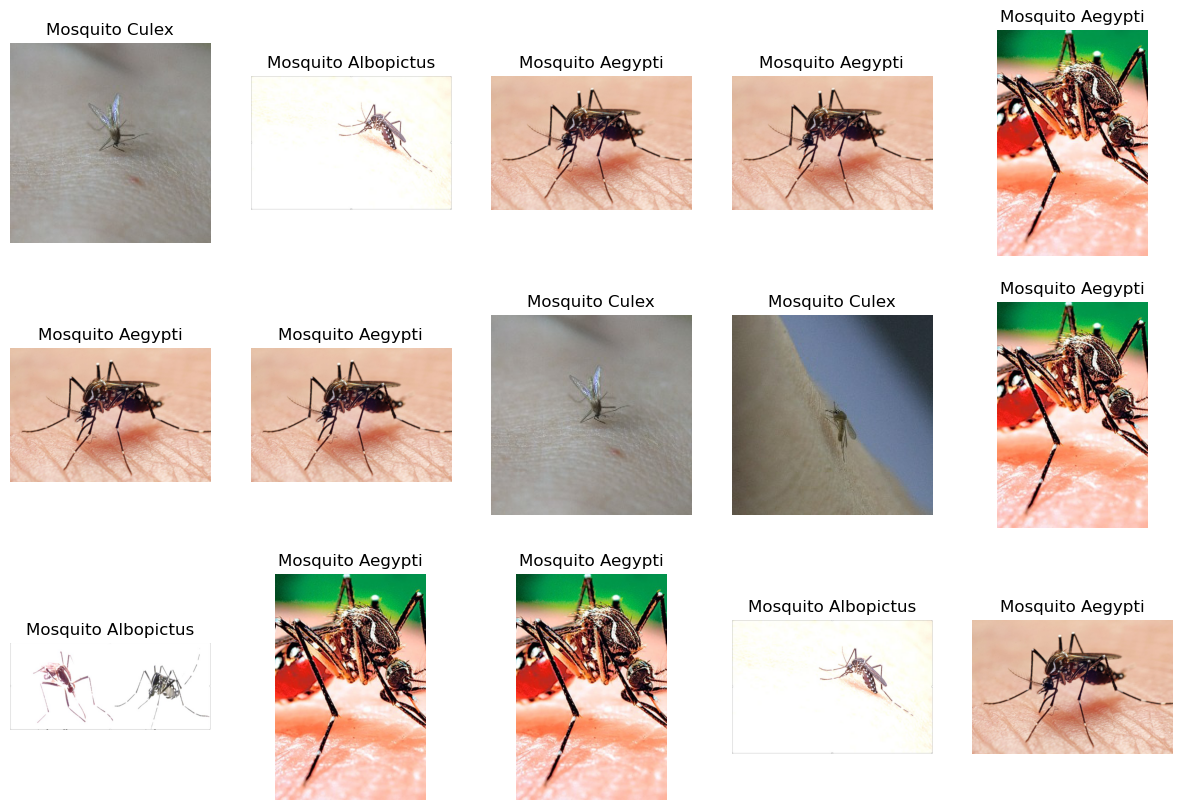

In [11]:
plt.figure(figsize=(15,10))
for i in range(15):
    ran = random.choice((1,100))
    rand_aegypti = [os.path.join(train_Aegypti, f) for f in train_dir_Aegypti[ran:ran+1]]
    rand_albopictus = [os.path.join(train_Albopictus, f) for f in train_dir_Albopictus[ran:ran+1]]
    rand_culex = [os.path.join(train_Culex, f) for f in train_dir_Culex[ran:ran+1]]
    rand = random.choice(rand_aegypti+rand_albopictus+rand_culex)
    name = rand.split('/')
    if name[-2] == "Train": name = "Mosquito Culex" 
    else: name = "Mosquito " + name[-2]
    plt.subplot(3,5,i+1)
    img = plt.imread(rand)
    plt.imshow(img, cmap="gray")
    plt.axis(False)
    plt.title(name)
plt.show()

Visualizando una imagen sola

Sample_Image_size(H*W): (456, 320, 3)


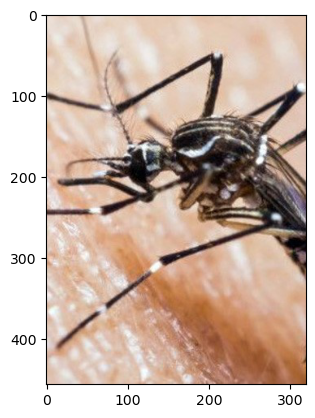

In [13]:
sample = random.choice(train_dir_Aegypti)
sample = plt.imread(train_Aegypti + sample)
samp = sample.shape
plt.imshow(sample)
print("Sample_Image_size(H*W):", samp)

Seguimos con el preprocesamiento de nuestras imágenes

In [5]:
train = ImageDataGenerator(rescale=1./255)
valid = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)

Finalmente para formar los conjuntos de entrenamiento, validación y prueba vamos a colocar las imágenes en un sólo directorio para poder usar el método "flow from directory". Esta manipulación de los directorios lo haremos en la terminal directamente

In [17]:
os.makedirs(Path+"train", exist_ok=True)
os.makedirs(Path+"valid", exist_ok=True)
os.makedirs(Path+"test", exist_ok=True)

shutil.move(Path+train_Aegypti[:-1], Path+"train")
shutil.move(Path+train_Albopictus[:-1], Path+"train")
shutil.move(Path+train_Culex[:-1], Path+"train")

shutil.move(Path+valid_Aegypti[:-1], Path+"valid")
shutil.move(Path+valid_Albopictus[:-1], Path+"valid")
shutil.move(Path+valid_Culex[:-1], Path+"valid")

shutil.move(Path+test_Aegypti[:-1], Path+"test")
shutil.move(Path+test_Albopictus[:-1], Path+"test")
shutil.move(Path+test_Culex[:-1], Path+"test")

'test/Test'

In [18]:
os.listdir(Path+"train")

['Train', 'Aegypti', 'Albopictus']

In [19]:
os.listdir(Path+"valid")

['Aegypti', 'Val', 'Albopictus']

In [20]:
os.listdir(Path+"test")

['Test', 'Aegypti', 'Albopictus']

In [21]:
os.rename(Path+"train/Train", Path+"train/Culex")
os.listdir(Path+"train")

['Aegypti', 'Albopictus', 'Culex']

In [22]:
os.rename(Path+"valid/Val", Path+"valid/Culex")
os.listdir(Path+"valid/")

['Aegypti', 'Albopictus', 'Culex']

In [23]:
os.rename(Path+"test/Test", Path+"test/Culex")
os.listdir(Path+"test/")

['Aegypti', 'Albopictus', 'Culex']

In [6]:
train_dataset = train.flow_from_directory(Path+"train/",
                                         target_size=(250,250),
                                         batch_size=8,
                                         class_mode="categorical")

Found 917 images belonging to 3 classes.


In [7]:
validation_dataset = valid.flow_from_directory(Path+"valid/",
                                              target_size=(250,250),
                                              batch_size=8,
                                              class_mode="categorical")

Found 399 images belonging to 3 classes.


In [8]:
test_dataset = test.flow_from_directory(Path+"test/",
                                        target_size=(250,250),
                                        batch_size=8,
                                        class_mode="categorical"
                                       )

Found 130 images belonging to 3 classes.


In [9]:
validation_dataset.class_indices

{'Aegypti': 0, 'Albopictus': 1, 'Culex': 2}

Con todo esto ya preparado podemos pasar al diseño de las redes neuronales convolucionales

### Modelo 1
Vamos primero a entrenar un modelo con la arquitectura original que se propuso para esta red neuronal

In [24]:
model1 = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250,250,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [25]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [26]:
model1.compile(optimizer="adam",
              loss="categorical_crossentropy",
               metrics = ["accuracy"])

In [27]:
history1 = model1.fit(train_dataset,
                     steps_per_epoch=50,
                     epochs=30,
                     validation_data=validation_dataset,
                     validation_steps=13,
                     verbose=2)

Epoch 1/30
50/50 - 26s - loss: 1.2575 - accuracy: 0.6525 - val_loss: 0.3962 - val_accuracy: 0.8654 - 26s/epoch - 518ms/step
Epoch 2/30
50/50 - 5s - loss: 0.4525 - accuracy: 0.8489 - val_loss: 0.4533 - val_accuracy: 0.8462 - 5s/epoch - 91ms/step
Epoch 3/30
50/50 - 4s - loss: 0.3930 - accuracy: 0.8640 - val_loss: 0.2280 - val_accuracy: 0.8846 - 4s/epoch - 78ms/step
Epoch 4/30
50/50 - 4s - loss: 0.2156 - accuracy: 0.9225 - val_loss: 0.2677 - val_accuracy: 0.9135 - 4s/epoch - 74ms/step
Epoch 5/30
50/50 - 4s - loss: 0.1945 - accuracy: 0.9150 - val_loss: 0.3415 - val_accuracy: 0.9038 - 4s/epoch - 77ms/step
Epoch 6/30
50/50 - 4s - loss: 0.1610 - accuracy: 0.9400 - val_loss: 0.1330 - val_accuracy: 0.9327 - 4s/epoch - 74ms/step
Epoch 7/30
50/50 - 4s - loss: 0.1307 - accuracy: 0.9325 - val_loss: 0.1983 - val_accuracy: 0.9423 - 4s/epoch - 79ms/step
Epoch 8/30
50/50 - 4s - loss: 0.0963 - accuracy: 0.9725 - val_loss: 0.0978 - val_accuracy: 0.9615 - 4s/epoch - 80ms/step
Epoch 9/30
50/50 - 4s - loss:

Vamos guardando cada modelo

In [36]:
shutil.rmtree(Path+"modelo1_tarea2", ignore_errors=True)
model1.save(Path+"modelo1_tarea2", save_format="tf")

INFO:tensorflow:Assets written to: modelo1_tarea2\assets


INFO:tensorflow:Assets written to: modelo1_tarea2\assets


In [37]:
model1.save_weights("weights1")

### Modelo 2

Vamos a entrenar un segundo modelo con la misma arquitectura de la parte convolucional, pero agregando más capas densas

In [30]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250,250,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(756, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(372, activation='relu'),
    keras.layers.Dense(123, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [31]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 124, 124, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 29, 29, 64)      

In [32]:
model2.compile(optimizer="adam",
               loss="categorical_crossentropy",
               metrics=["accuracy"])

In [33]:
history2 = model2.fit(train_dataset,
                      steps_per_epoch=50,
                      epochs=30,
                      validation_data=validation_dataset,
                      validation_steps=13,
                      verbose=2)

Epoch 1/30
50/50 - 6s - loss: 0.8446 - accuracy: 0.6900 - val_loss: 0.4085 - val_accuracy: 0.8750 - 6s/epoch - 123ms/step
Epoch 2/30
50/50 - 5s - loss: 0.3813 - accuracy: 0.8500 - val_loss: 0.3772 - val_accuracy: 0.8654 - 5s/epoch - 93ms/step
Epoch 3/30
50/50 - 5s - loss: 0.3659 - accuracy: 0.8450 - val_loss: 0.1862 - val_accuracy: 0.8846 - 5s/epoch - 93ms/step
Epoch 4/30
50/50 - 5s - loss: 0.3330 - accuracy: 0.8917 - val_loss: 0.4059 - val_accuracy: 0.8558 - 5s/epoch - 95ms/step
Epoch 5/30
50/50 - 5s - loss: 0.2801 - accuracy: 0.9175 - val_loss: 0.6471 - val_accuracy: 0.9327 - 5s/epoch - 98ms/step
Epoch 6/30
50/50 - 4s - loss: 0.2376 - accuracy: 0.9194 - val_loss: 0.1363 - val_accuracy: 0.9231 - 4s/epoch - 90ms/step
Epoch 7/30
50/50 - 5s - loss: 0.1719 - accuracy: 0.9370 - val_loss: 0.2894 - val_accuracy: 0.9712 - 5s/epoch - 91ms/step
Epoch 8/30
50/50 - 5s - loss: 0.1000 - accuracy: 0.9650 - val_loss: 0.2396 - val_accuracy: 0.9423 - 5s/epoch - 90ms/step
Epoch 9/30
50/50 - 5s - loss: 0

Guardamos el modelo

In [34]:
shutil.rmtree(Path+"modelo2_tarea2", ignore_errors=True)
model2.save(Path+"modelo2_tarea2", save_format="tf")

INFO:tensorflow:Assets written to: modelo2_tarea2\assets


INFO:tensorflow:Assets written to: modelo2_tarea2\assets


In [35]:
model2.save_weights("weights2")

### Modelo 3

Para este tercer modelo vamos a proponer una arquitectura más robusta en la parte convolucional. Además, vamos a dar más muestras para el entrenamiento en cada época (aunque no tantas para evitar el sobreajuste).

In [41]:
model3 = keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(250,250,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(256, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(512, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(756, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(372, activation='relu'),
    keras.layers.Dense(123, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [42]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 248, 248, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 124, 124, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 122, 122, 128)     73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 61, 61, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 59, 59, 256)       295168    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 29, 29, 256)     

In [43]:
model3.compile(optimizer="adam",
               loss="categorical_crossentropy",
               metrics=["accuracy"])

In [44]:
history3 = model3.fit(train_dataset,
                      steps_per_epoch=100,
                      epochs=30,
                      validation_data=validation_dataset,
                      validation_steps=26,
                      verbose=1)

Epoch 1/30
100/100 [==============================] - 26s 232ms/step - loss: 0.8675 - accuracy: 0.6662 - val_loss: 1.4524 - val_accuracy: 0.8462
Epoch 2/30
100/100 [==============================] - 9s 90ms/step - loss: 0.3928 - accuracy: 0.8130 - val_loss: 0.2176 - val_accuracy: 0.8558
Epoch 3/30
100/100 [==============================] - 9s 89ms/step - loss: 0.2972 - accuracy: 0.8720 - val_loss: 0.2568 - val_accuracy: 0.8750
Epoch 4/30
100/100 [==============================] - 9s 91ms/step - loss: 0.2739 - accuracy: 0.8720 - val_loss: 0.2017 - val_accuracy: 0.8846
Epoch 5/30
100/100 [==============================] - 9s 90ms/step - loss: 0.2398 - accuracy: 0.8959 - val_loss: 0.2058 - val_accuracy: 0.8990
Epoch 6/30
100/100 [==============================] - 9s 90ms/step - loss: 0.1798 - accuracy: 0.9112 - val_loss: 0.1676 - val_accuracy: 0.9183
Epoch 7/30
100/100 [==============================] - 9s 89ms/step - loss: 0.1694 - accuracy: 0.9272 - val_loss: 0.1910 - val_accuracy: 0.87

In [45]:
shutil.rmtree(Path+"modelo3_tarea2", ignore_errors=True)
model3.save(Path+"modelo3_tarea2", save_format="tf")

INFO:tensorflow:Assets written to: modelo3_tarea2\assets


INFO:tensorflow:Assets written to: modelo3_tarea2\assets


In [46]:
model3.save_weights("weights3")

### Modelo 4

Vamos a dar un enfoque con capas de dropout y batchnormalization para evitar un posible sobreajuste en la arquitectura la red del modelo 3. Justo con eso podremos entrenar con los conjuntos de entrenamiento y validación completos.

In [15]:
model4 = keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(250,250,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(256, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(512, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(756, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(372, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(123, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(3, activation='softmax')
])

In [16]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 248, 248, 64)      1792      
                                                                 
 batch_normalization_12 (Bat  (None, 248, 248, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 124, 124, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 122, 122, 128)     73856     
                                                                 
 batch_normalization_13 (Bat  (None, 122, 122, 128)    512       
 chNormalization)                                                
                                                      

Vamos ahora a compilar con un optimizador diferente: SGD

In [21]:
model4.compile(optimizer="SGD",
               loss="categorical_crossentropy",
               metrics=["accuracy"])

In [23]:
history4 = model4.fit(train_dataset,
                      epochs=30,
                      validation_data=validation_dataset,
                      verbose=1)

Epoch 1/30
115/115 [==============================] - 12s 96ms/step - loss: 0.2868 - accuracy: 0.8353 - val_loss: 0.2557 - val_accuracy: 0.8722
Epoch 2/30
115/115 [==============================] - 10s 90ms/step - loss: 0.2710 - accuracy: 0.8451 - val_loss: 0.2120 - val_accuracy: 0.8822
Epoch 3/30
115/115 [==============================] - 11s 93ms/step - loss: 0.2999 - accuracy: 0.8353 - val_loss: 2.2175 - val_accuracy: 0.1404
Epoch 4/30
115/115 [==============================] - 10s 90ms/step - loss: 0.2704 - accuracy: 0.8550 - val_loss: 0.2035 - val_accuracy: 0.8822
Epoch 5/30
115/115 [==============================] - 11s 94ms/step - loss: 0.2618 - accuracy: 0.8626 - val_loss: 0.3452 - val_accuracy: 0.8672
Epoch 6/30
115/115 [==============================] - 11s 92ms/step - loss: 0.2614 - accuracy: 0.8713 - val_loss: 0.2094 - val_accuracy: 0.8797
Epoch 7/30
115/115 [==============================] - 10s 91ms/step - loss: 0.2478 - accuracy: 0.8680 - val_loss: 0.2045 - val_accuracy:

In [24]:
shutil.rmtree(Path+"modelo4_tarea2", ignore_errors=True)
model4.save(Path+"modelo4_tarea2", save_format="tf")

INFO:tensorflow:Assets written to: modelo4_tarea2\assets


INFO:tensorflow:Assets written to: modelo4_tarea2\assets


In [25]:
model4.save_weights("weights3")

Teniendo estos 4 modelos candidatos podemos hacer ejecuciones y realizar comparaciones

## Ejemplos de ejecución

Primero podemos poner a prueba los 4 modelos con el conjunto de prueba.

In [6]:
model1 = tf.keras.models.load_model(Path+"modelo1_tarea2")
model2 = tf.keras.models.load_model(Path+"modelo2_tarea2")
model3 = tf.keras.models.load_model(Path+"modelo3_tarea2")
model4 = tf.keras.models.load_model(Path+"modelo4_tarea2")

In [28]:
model1.evaluate(test_dataset)

17/17 [==============================] - 1s 46ms/step - loss: 0.5889 - accuracy: 0.9077


[0.5889448523521423, 0.9076923131942749]

In [38]:
model2.evaluate(test_dataset)

17/17 [==============================] - 1s 51ms/step - loss: 0.4262 - accuracy: 0.8846


[0.42620959877967834, 0.8846153616905212]

In [47]:
model3.evaluate(test_dataset)

17/17 [==============================] - 1s 44ms/step - loss: 2.7630 - accuracy: 0.8846


[2.7629806995391846, 0.8846153616905212]

In [26]:
model4.evaluate(test_dataset)

17/17 [==============================] - 2s 72ms/step - loss: 0.5604 - accuracy: 0.7615


[0.5604345202445984, 0.7615384459495544]

Ahora podemos pasar a graficar el desempeño de los modelos durante su entrenamiento. Esto nos puede dar una idea de si hubo sobreajuste.

Text(0.5, 1.0, 'Loss in training and validation model 1')

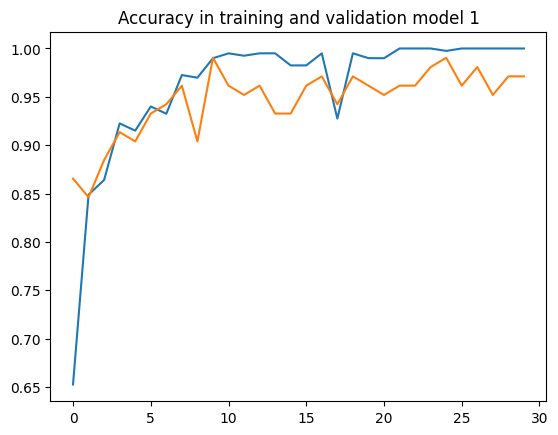

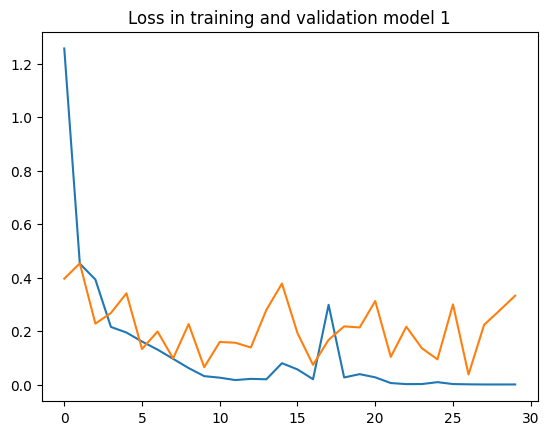

In [39]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

# plot accuracy with matplotlib
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and validation model 1')
plt.figure()

# plot loss with matplotlib
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and validation model 1')

Text(0.5, 1.0, 'Loss in training and validation model 2')

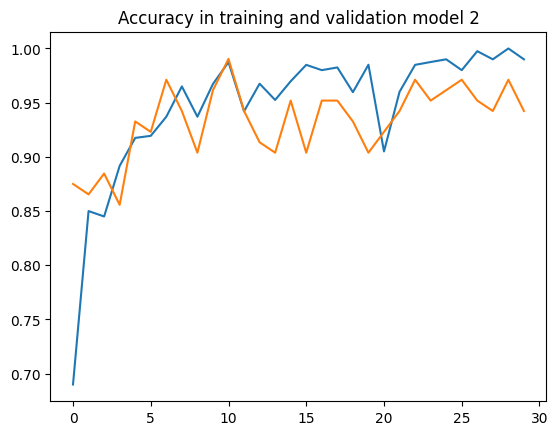

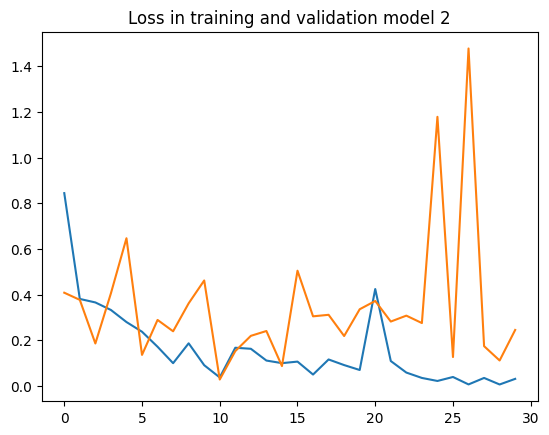

In [40]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

# plot accuracy with matplotlib
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and validation model 2')
plt.figure()

# plot loss with matplotlib
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and validation model 2')

Text(0.5, 1.0, 'Loss in training and validation model 3')

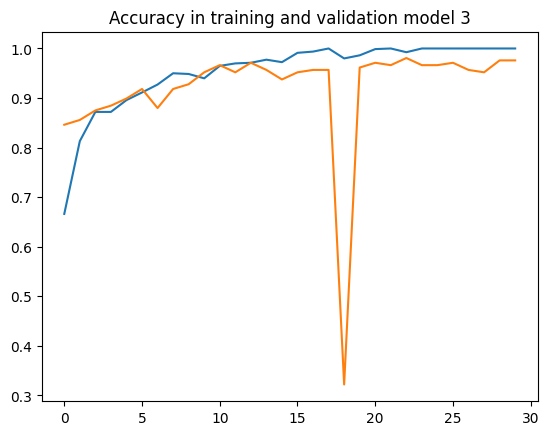

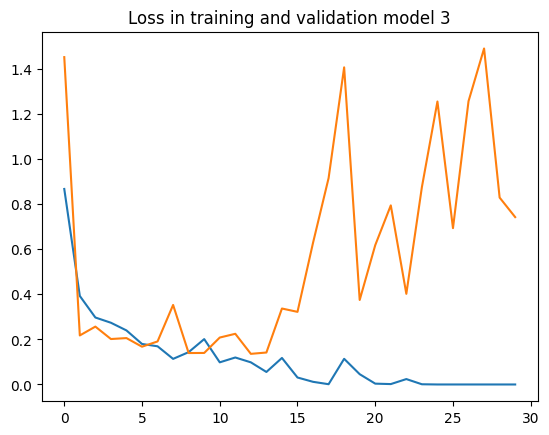

In [48]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

# plot accuracy with matplotlib
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and validation model 3')
plt.figure()

# plot loss with matplotlib
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and validation model 3')

Text(0.5, 1.0, 'Loss in training and validation model 4')

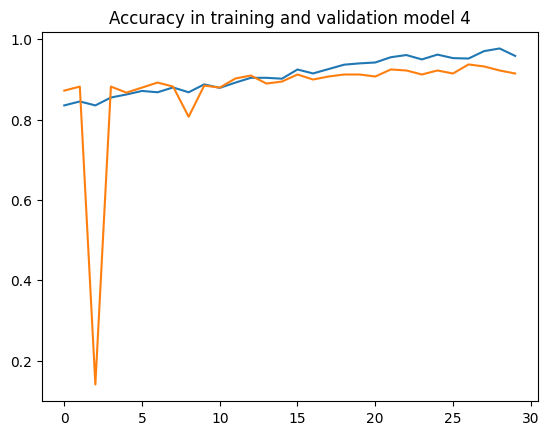

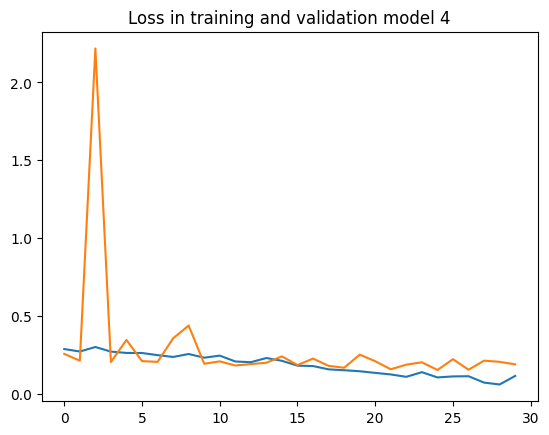

In [27]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

# plot accuracy with matplotlib
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and validation model 4')
plt.figure()

# plot loss with matplotlib
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and validation model 4')

Analizando estos resultados:

A nivel de desempeño con el conjunto de pruebas:
| Modelo 1 | Modelo 2 | Modelo 3 | Modelo 4 |
| - | - | - | - |
| 90.76% | 88.46% | 88.46% | 76.15% |

Lo primero que podemos notar es el sobreajuste que sufrió el cuarto modelo. Recordemos que este modelo fue al que le agregamos varias capas de normalización y de dropout. En un inicio se había pensado que iba a servir justo para el sobreajuste. Sin embargo, resultó que en realidad del modelo de pasar a tener porcentajes superiores al 90% en los de entrenamiento y validación, en las pruebas bajó hasta el 76%. Vale la pena recordar que este fue el único modelo que trabajó con el optimizador SGD.

Por otro lado, los modelos 2 y 3 obtuvieron exactamente el mismo resultado con el conjunto de pruebas. Lo interesante aquí es ver sus resultados durante el entrenamiento: el modelo 2 se mantuvo constante por arriba el 90% tanto en el entrenamiento como en la validación. Por lo que el resultado podría sólo mejorarse con unas épocas más de entrenamiento.

Mientras tanto, el modelo 3 tuvo un desempeño muy alto en el entrenamiento, excepto por una época en la que la efectividad decayó completamente. Entonces al ser tan constante en el entrenamiento en métricas muy altas, muestra que el modelo ya sobreajustó por el resultado en las pruebas. Por lo que entre el modelo 2 y el 3 es mejor el 2.

Finalmente el modelo 1. Recordemos que este modelo fue el único que conservó la parte convolucional tal y como nos la entregaron para esta práctica. Lo único que se modificó fue la parte densa agregando varias capas completamente conectadas. Esto indica que la parte de visión computacional estuvo bien hecho y el camino a seguir fue el correcto al atacar las capas completamente conectadas. Además, su gráfica no muestra muchas separación entre las líneas de entrenamiento y prueba. Por lo que el modelo no parece tener un sobreajuste tan fuerte. Siendo así el modelo ganador, superando el 88% de accuracy original.

## Conclusión

Mejorar un modelo de aprendizaje profundo no es una tarea fácil, ya que el sobreajuste siempre nos puede llegar a afectar, haciendo la tarea de subir el accuracy más complicada de lo que parece.

En esta práctica se lograron dos aspectos muy importantes:
- Subir la métrica del 88% al 90%
- Entrenar la red neuronal con una nueva especie de mosquito y que efectivamente funcionó correctamente.

Además, algunos aspectos como el practicar con capas de maxpooling, batchnormalization y dropout fueron aprovechados a lo largo del trabajo aunque no contribuyeran en mejorar los modelos.

Finalmente, el trabajo a futuro que queda lo constituyen precisamente la parte de mejorar la regularización de la red neuronal, junto con la parte de mejorar el desempeño del modelo ganador. La clave para esto último parece estar en mejorar la parte completamente conectada del modelo.

## Referencias

Para el trabajo la única referencia adicional al material de las sesiones del diplomado fue la documentación de Keras sobre optimizadores:
- Keras optimizers. https://keras.io/api/optimizers/